In [ ]:
import matplotlib.pyplot as plt
from scipy.special import expit #To use sigmoid function
import numpy as np
from sklearn.preprocessing import normalize #To normalize data

In [ ]:
Xsis = np.array([120, 129, 139, 140, 180], dtype = float)
Xdias = np.array([80, 80, 89, 90, 120], dtype = float)

In [ ]:
#Normalize the data, then use sigmoid function
Xsis_normalized = Xsis / np.linalg.norm(Xsis)
Xdias_normalized = Xsis / np.linalg.norm(Xdias)
#Xsis_normalized = normalize(Xsis.reshape(1,5), norm='l2')
#Xasis_normalized = normalize(Xsis.reshape(1,5), norm='l2')


In [ ]:
Ysis = expit(Xsis_normalized)
Ydias = expit(Xdias_normalized)
print(Ysis)
print(Ydias)

[0.5926834  0.59945621 0.60693713 0.60768253 0.63705493]
[0.64042517 0.65033243 0.66118996 0.66226666 0.70387414]


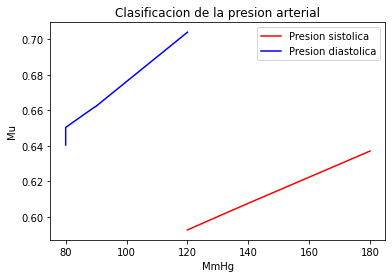

In [ ]:
plt.plot(Xsis, Ysis, color='r', label='Presion sistolica')
plt.plot(Xdias, Ydias, color='b', label='Presion diastolica')
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("MmHg")
plt.ylabel("Mu")
plt.title("Clasificacion de la presion arterial")
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
# To load the display window
plt.show()

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 23.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=486f148d2953b0485a2edfccf92a8e4b11f9f85e2f555785a06ec6fcf52c9342
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


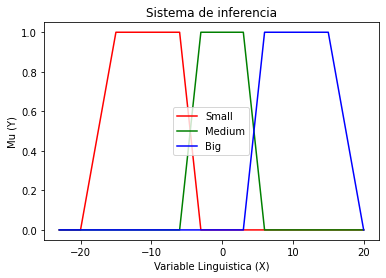

In [ ]:
#We set the range of the variable, each variable (X entry,Y exit) has it attributes (small,medium,big)
#Two variables and three rules
x_range = np.arange(-23, 21)
y_range = np.arange(-4, 16)

#STEP 1: FUZZYFICATION
# We generate the fuzzy membership functions
x_small_mf = fuzz.trapmf(x_range,[-20, -15, -6, -3])
x_medium_mf = fuzz.trapmf(x_range,[-6, -3, 3, 6])
x_big_mf = fuzz.trapmf(x_range,[3, 6, 15, 20])

#y_small_mf = fuzz.trapmf(y_range,[-2.46, -1.46, 1.46, 2.46])
#y_medium_mf = fuzz.trapmf(y_range,[1.46, 2.46, 5, 7])
#y_big_mf = fuzz.trapmf(y_range,[5, 7, 13, 15])

plt.xlabel("Variable Linguistica (X)")
plt.ylabel("Mu (Y)")
plt.title("Sistema de inferencia")
plt.plot(x_range, x_small_mf, 'r', linewidth=1.5, label='Small')
plt.plot(x_range, x_medium_mf, 'g', linewidth=1.5, label='Medium')
plt.plot(x_range, x_big_mf, 'b', linewidth=1.5, label='Big')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Output membership activity')

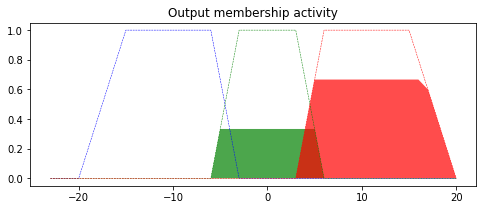

In [ ]:
#We activate the fuzzyfication
#5 is the value we use to analyze the results (it's given)
#Assign each value with a Mu
x_small_fuzzy = fuzz.interp_membership(x_range, x_small_mf, 5)
x_medium_fuzzy = fuzz.interp_membership(x_range, x_medium_mf, 5)
x_big_fuzzy = fuzz.interp_membership(x_range, x_big_mf, 5)

#STEP 2: INFERENCE (Generl. Modus Ponens)
#We make and apply the 3 rules
#FIX X_small_mf!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
active_rule1 = np.fmin(x_small_fuzzy, x_small_mf)
active_rule2 = np.fmin(x_medium_fuzzy, x_medium_mf)
active_rule3 = np.fmin(x_big_fuzzy, x_big_mf)
x0 = np.zeros_like(x_range)

#We plot the results
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x_range, x0, active_rule1, facecolor='b', alpha=0.7)
ax0.plot(x_range, x_small_mf, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_range, x0, active_rule2, facecolor='g', alpha=0.7)
ax0.plot(x_range, x_medium_mf, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_range, x0, active_rule3, facecolor='r', alpha=0.7)
ax0.plot(x_range, x_big_mf, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

Text(0.5, 1.0, 'Aggregated membership and result (line)')

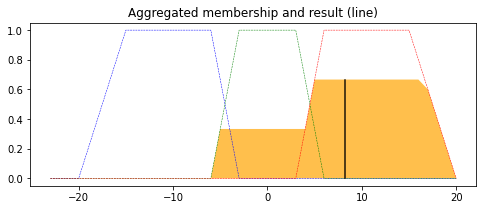

In [ ]:
#STEP 3: AGGREGATION
aggregated = np.fmax(active_rule1,np.fmax(active_rule2,active_rule3))

#STEP 4: DEZZFUSSIFIATION (with centroid method)
result = fuzz.defuzz(x_range, aggregated, 'centroid')

#We plot the results
rule_activation = fuzz.interp_membership(x_range, aggregated, result)
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_range, x_small_mf, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_range, x_medium_mf, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_range, x_big_mf, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_range, x0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([result, result], [0, rule_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')